In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/DBDA_Official10/Machine_Learning/main/Assignment/Datasets/Wine.csv')

In [3]:
df_new = df.drop(['Customer_Segment'] , axis = 1)


In [4]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

scaled_values = minmax_scaler.fit_transform(df_new)

In [5]:
df_new

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [6]:
df_new['Customer_Segment'] = df['Customer_Segment']

<Axes: ylabel='Alcohol'>

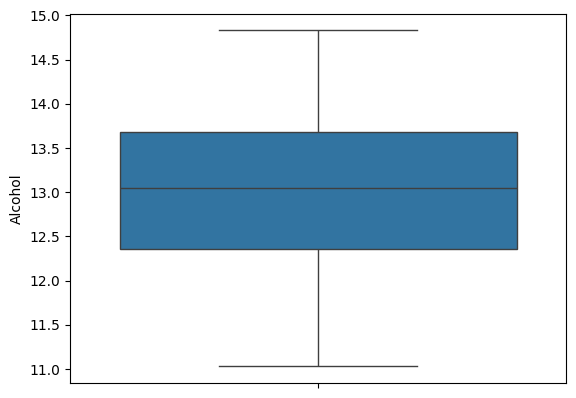

In [7]:
sns.boxplot(df_new['Alcohol'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [9]:
Q1 = df['Malic_Acid'].quantile(0.25)
Q3 = df['Malic_Acid'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [10]:
df = df[df['Malic_Acid'] < upper_bound]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               175 non-null    float64
 1   Malic_Acid            175 non-null    float64
 2   Ash                   175 non-null    float64
 3   Ash_Alcanity          175 non-null    float64
 4   Magnesium             175 non-null    int64  
 5   Total_Phenols         175 non-null    float64
 6   Flavanoids            175 non-null    float64
 7   Nonflavanoid_Phenols  175 non-null    float64
 8   Proanthocyanins       175 non-null    float64
 9   Color_Intensity       175 non-null    float64
 10  Hue                   175 non-null    float64
 11  OD280                 175 non-null    float64
 12  Proline               175 non-null    int64  
 13  Customer_Segment      175 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 20.5 KB


In [12]:
xyz = list(df['Malic_Acid'][df['Malic_Acid'] > upper_bound])
xyz

[5.8, 5.51, 5.65]

In [16]:
mean=df['Malic_Acid'].mean()
mean

np.float64(2.2804440727180912)

In [17]:
df['Malic_Acid'] = df['Malic_Acid'].replace(to_replace= xyz, value = mean)

<Axes: ylabel='Malic_Acid'>

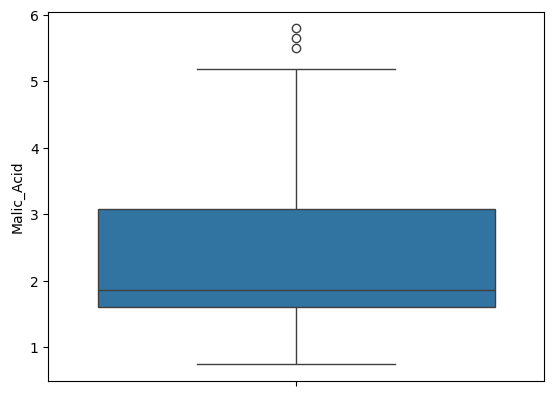

In [18]:
sns.boxplot(df_new['Malic_Acid'])